### Practice Lab: Linear Regression

#### Outline
- [ 1 - Linear regression with one variable ](#2)
  - [ 1.1 Problem Statement](#2.1)
  - [ 1.2  Dataset](#2.2)
  - [ 1.3 Refresher on linear regression](#2.3)
  - [ 1.4  Compute Cost](#2.4)
    - [ Exercise 1](#ex01)
  - [ 1.5 Gradient descent ](#2.5)
    - [ Exercise 2](#ex02)
  - [ 1.6 Learning parameters using batch gradient descent ](#2.6)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

import matplotx

plt.style.use(matplotx.styles.github["dark"])

#### 2 - Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

#### 3 - Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [11]:
x_train, y_train = load_data()

In [12]:
print("First five elements of x_train are:\n", x_train[:5]) 
print("First five elements of y_train are:\n", y_train[:5])  

First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


`x_train` is a numpy array that contains decimal values that are all greater than zero.
- These values represent the city population times 10,000
- For example, 6.1101 means that the population for that city is 61,101

`y_train` is a numpy array that has decimal values, some negative, some positive.
- These represent your restaurant's average monthly profits in each city, in units of \$10,000.
  - For example, 17.592 represents \$175,920 in average monthly profits for that city.
  - -2.6807 represents -\$26,807 in average monthly loss for that city.

#### Checking the dimensions of your variables


In [13]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


#### Visualizing the data
- For this dataset, we can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). 

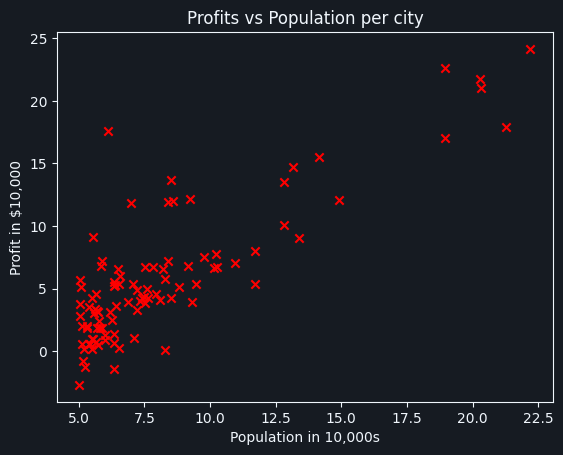

In [15]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profits vs Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population in 10,000s')
plt.show()

### Exercise 1 - Implementing linear regression

In [17]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost
        
        
        

In [18]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w (zeros): {cost:.3f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w (zeros): 75.203
All tests passed!


#### 6 - Gradient descent 

In [ ]:
def compute_gradient(x, y, w, b):   
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [28]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = x[i] * w + b
    dj_db = np.sum(y_pred - y)/m
    dj_dw = np.sum((y_pred - y) * x)/m
        
    return dj_dw, dj_db



In [29]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555671 -5.839135051546393
Using X with shape (4, 1)
All tests passed!


In [30]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114433 -4.007175051546392
